## Text2Mesh Colab Notebook
Colab notebook for [Text2Mesh](https://github.com/threedle/text2mesh). Notebook made by [mfrashad](https://github.com/mfrashad).

In [1]:
#@title Setup
!pip install trimesh==3.9.33 einops==0.3.2 scipy==1.5.2 \
             siren-pytorch==0.1.5 usd-core==21.8 \
             torch==1.9.0 torchtext==0.10.0 torchvision==0.10.0 cython==0.29.20 \
             git+https://github.com/openai/CLIP.git@04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git (to revision 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10) to /tmp/pip-req-build-9_cwlzle
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-9_cwlzle
  Running command git rev-parse -q --verify 'sha^04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10'
  Running command git fetch -q https://github.com/openai/CLIP.git 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10
  Running command git checkout -q 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10
  Resolved https://github.com/openai/CLIP.git to commit 04f4dc2ca1ed0acc9893bd1a3b526a7e02c4bb10
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.4/638.4 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.4/25.4 MB 49.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel 

In [2]:
#@title Install dependency (Kaolin)
!git clone --recursive https://github.com/NVIDIAGameWorks/kaolin
%cd kaolin
!git checkout v0.10.0
!python setup.py develop
%cd ..

Cloning into 'kaolin'...
remote: Enumerating objects: 4414, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 4414 (delta 124), reused 328 (delta 106), pack-reused 4051
Receiving objects: 100% (4414/4414), 88.09 MiB | 16.03 MiB/s, done.
Resolving deltas: 100% (2326/2326), done.
Submodule 'third_party/cub' (https://github.com/NVIDIA/cub) registered for path 'third_party/cub'
Cloning into '/content/kaolin/third_party/cub'...
remote: Enumerating objects: 32538, done.        
remote: Counting objects: 100% (369/369), done.        
remote: Compressing objects: 100% (185/185), done.        
remote: Total 32538 (delta 225), reused 285 (delta 182), pack-reused 32169        
Receiving objects: 100% (32538/32538), 17.50 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (27437/27437), done.
Submodule path 'third_party/cub': checked out '499a7bad3416fcc71a7c50351d6b3cdbf3fbbc27'
/content/kaolin
Note: switching to 'v0.10.0'.

You ar

In [3]:
#@title Get text2mesh
!git clone https://github.com/threedle/text2mesh
%cd text2mesh

Cloning into 'text2mesh'...
remote: Enumerating objects: 1172, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 1172 (delta 50), reused 52 (delta 28), pack-reused 1079
Receiving objects: 100% (1172/1172), 1.92 GiB | 17.09 MiB/s, done.
Resolving deltas: 100% (412/412), done.
/content/text2mesh


In [11]:
obj_path = "data/source_meshes/horse.obj"  #@param {type: "string"}
n_iter = 1200  #@param {type: "integer"}
prompt = "an image of a horse in an astronaut suit"
output_dir = "./results2"

In [23]:
#@title Run text2mesh, the intermediate results can be seen in 'text2mesh/results' directory
!python main.py --run branch \
                --obj_path {obj_path} \
                --output_dir {output_dir} \
                --prompt "{prompt}" \
                --sigma 2.0  --clamp tanh --n_normaugs 4 --n_augs 1 --normmincrop 0.1 --normmaxcrop 0.4 \
                --geoloss --colordepth 2 --normdepth 2 --frontview --frontview_std 4 --clipavg view \
                --lr_decay 0.9 --clamp tanh --normclamp tanh  --maxcrop 1.0 --save_render --seed 29 \
                --n_iter {n_iter}  --learning_rate 0.0005 --normal_learning_rate 0.0005 --standardize --no_pe --symmetry --background 1 1 1

ModuleList(
  (0): FourierFeatureTransform()
  (1): Linear(in_features=515, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=256, bias=True)
  (10): ReLU()
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=3, bias=True)
)
ModuleList(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=1, bias=True)
)
  0% 0/1200 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated.

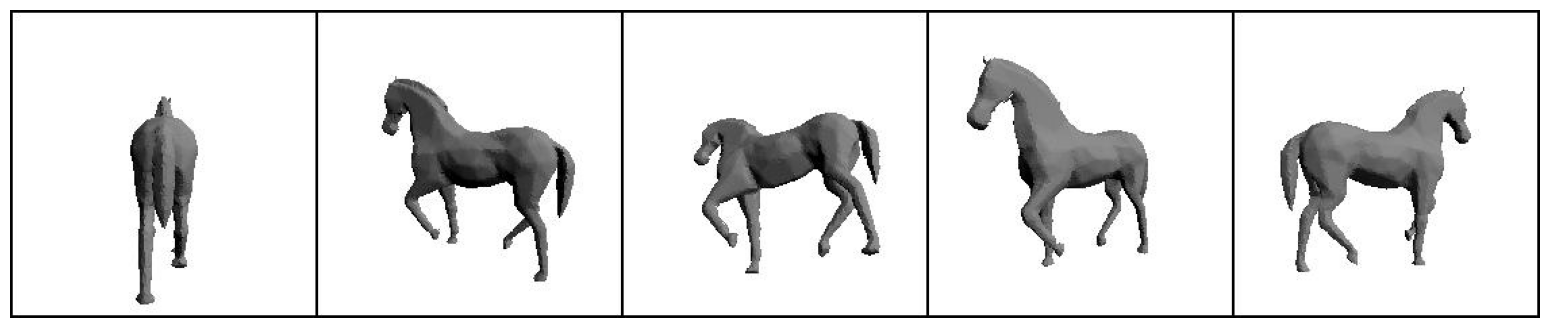

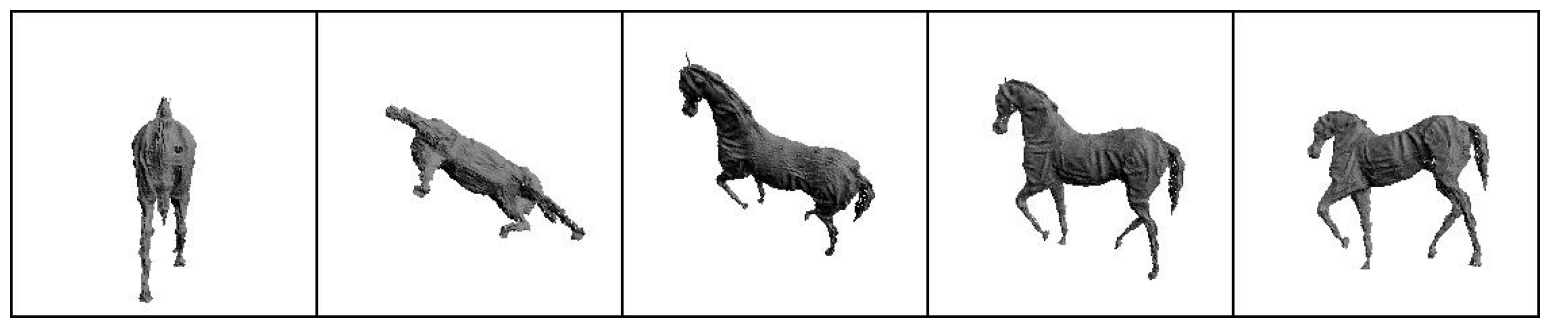

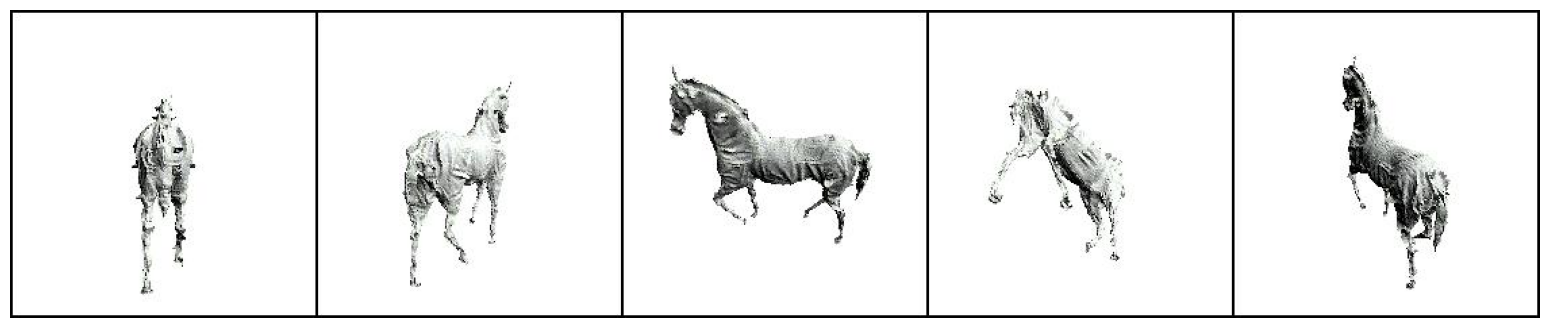

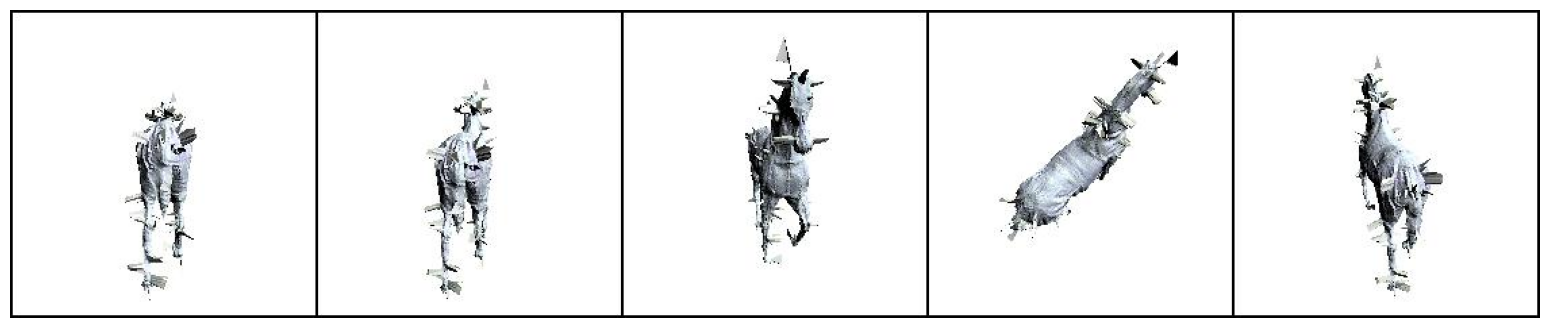

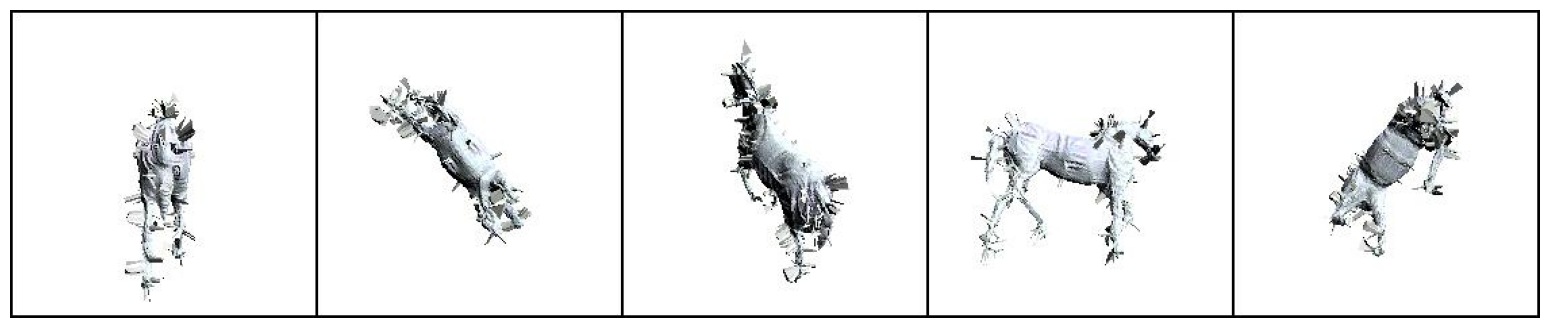

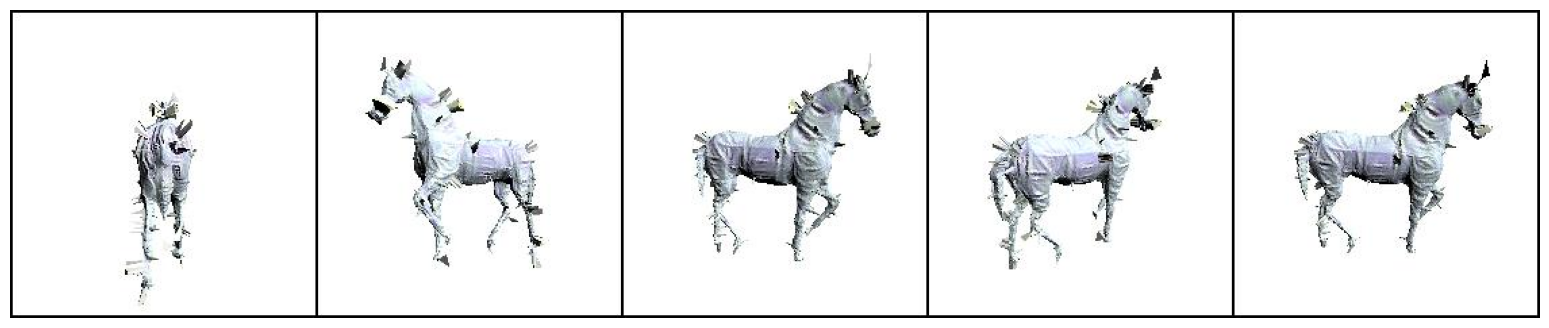

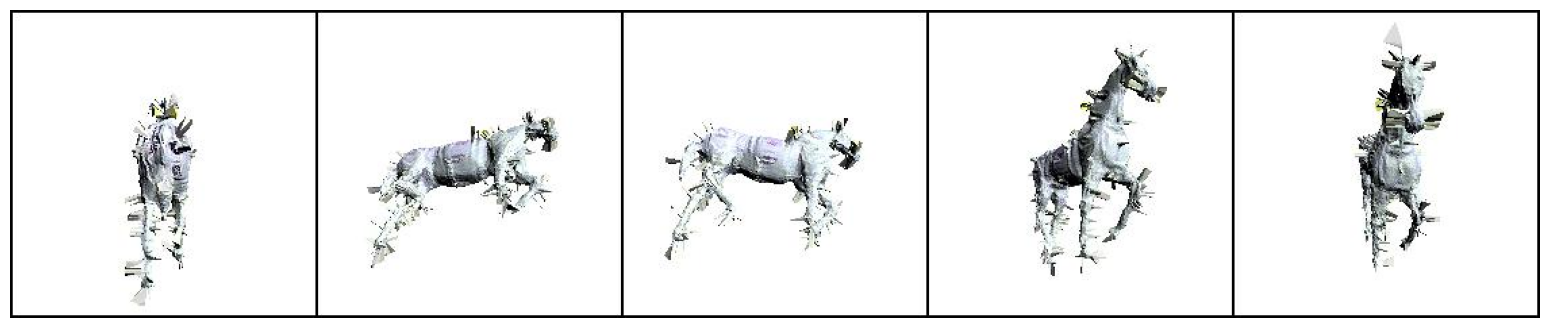

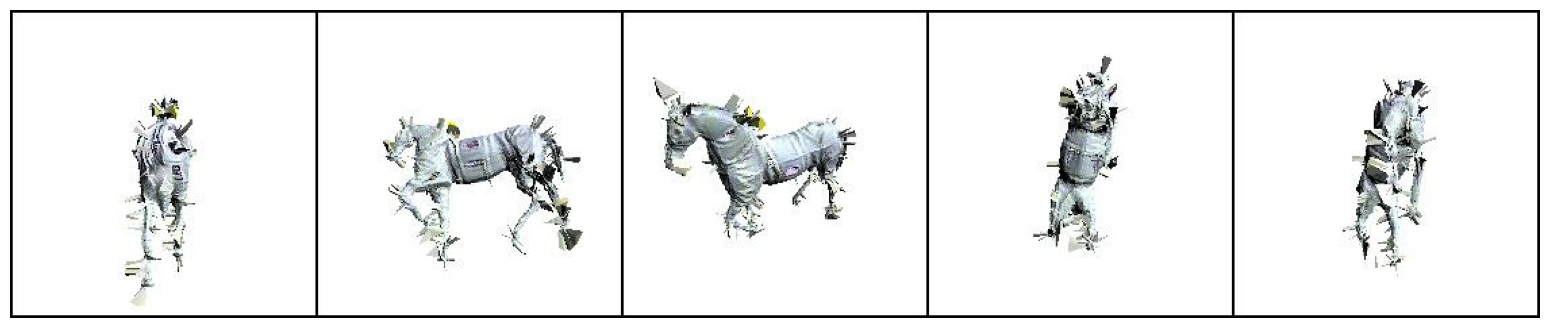

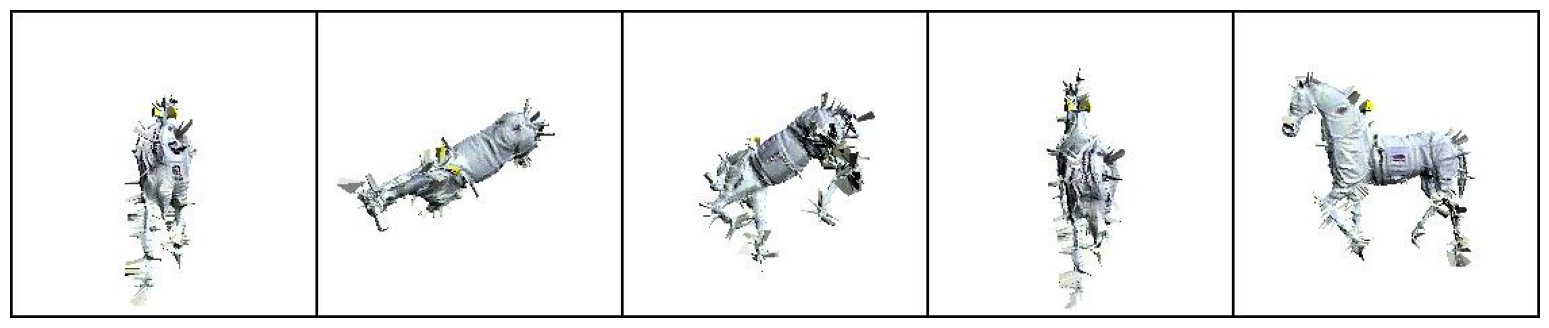

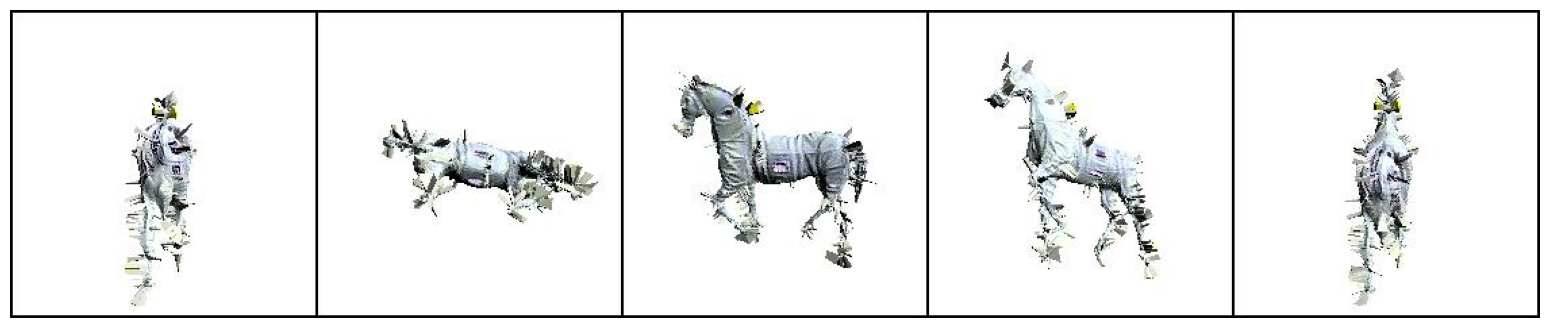

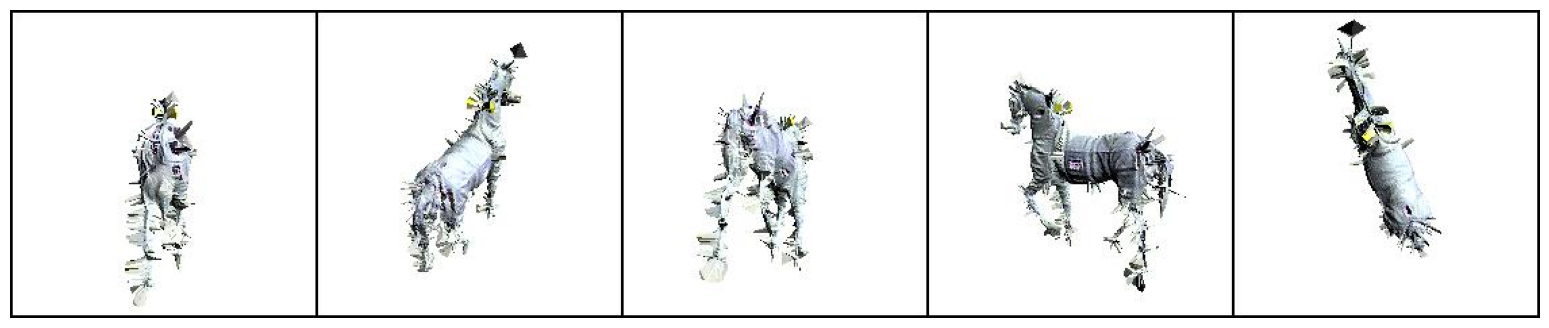

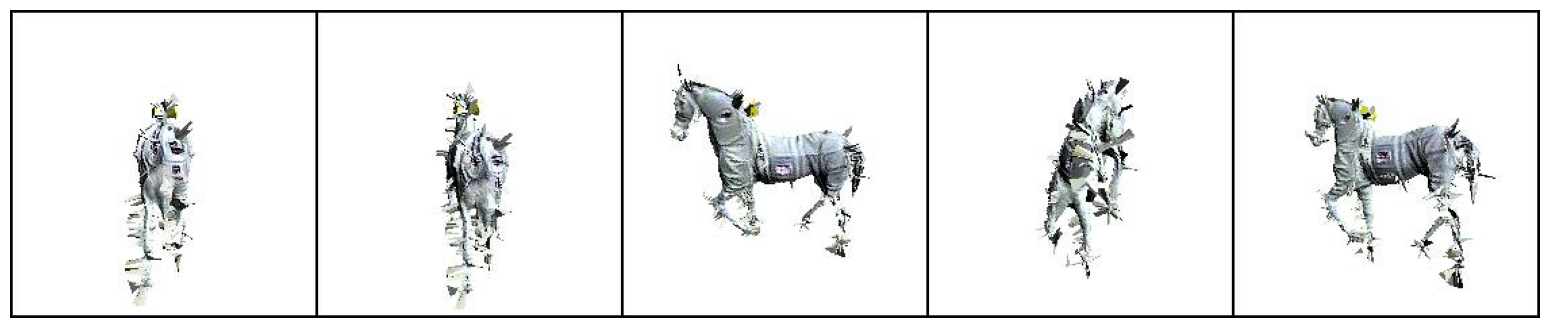

In [24]:
#@title export the results
import matplotlib.pyplot as plt
import importlib
import PIL
importlib.reload(PIL.TiffTags)
import cv2
import os


frames = []
for i in range(0, n_iter, 100):
    img = cv2.imread(os.path.join(output_dir, f"iter_{i}.jpg"))
    frames.append(img)
    plt.figure(figsize=(20, 4))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [25]:
#@title create video
from IPython.display import display, HTML
from base64 import b64encode
from tqdm.auto import tqdm
import cv2
fps = 2


video = cv2.VideoWriter("video.avi", 0, fps, frames[0].shape[:2][::-1]);
for im in tqdm(frames):
    video.write(im)
video.release()
!ffmpeg -y -i video.avi -pix_fmt yuv420p video.mp4 2> /dev/null
mp4 = open("video.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display(HTML(f"""
<video width={frames[0].shape[1]} controls>
      <source src="{data_url}" type="video/mp4">
</video>
"""))

  0%|          | 0/12 [00:00<?, ?it/s]